In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls

In [2]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [3]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_with_father'
batch='WILD_with_father2500'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()

In [4]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)

# Format data for task PLS

In [5]:
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

# Format data for hierarchy plotting

In [11]:
df_levels = upls.create_df_levels(volumes, level=8)

# Apply task PLS

In [12]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_n_cells.csv -o './results_pls/WILD_with_father2500_ncells'

In [13]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_energy.csv -o './results_pls/WILD_with_father2500_energy'

In [14]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_density.csv -o './results_pls/WILD_with_father2500_density'

In [15]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_relative_density.csv -o './results_pls/WILD_with_father2500_relative_density'

# PLS ncells

In [16]:
contrasts = pd.read_csv('./results_pls/WILD_with_father_contrasts.csv')
saliences = pd.read_csv('./results_pls/WILD_with_father_saliences.csv')
contrasts = contrasts.rename(columns={"group_Control": "Control", "group_Fam": "Fam", "group_Unfam":"Unfam"})

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

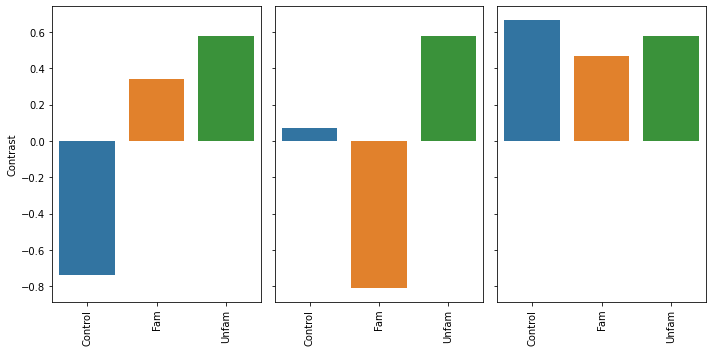

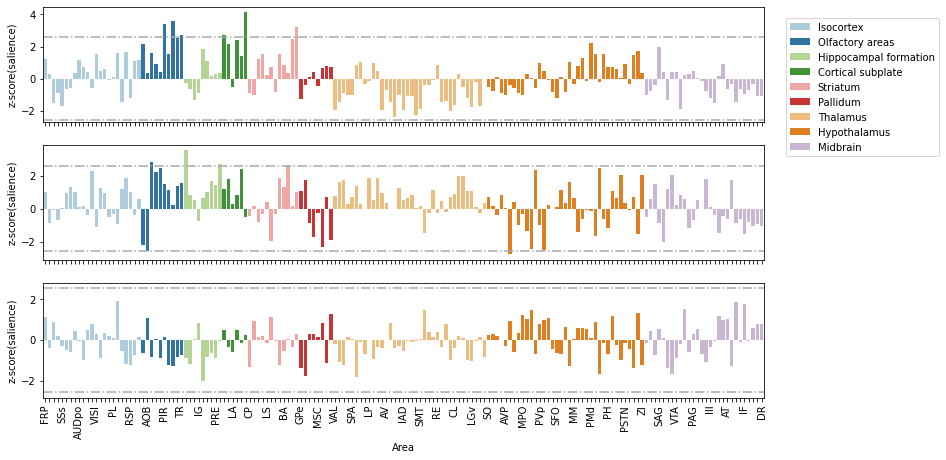

In [17]:
upls.plot_panel_contrasts(batch=batch, variable='ncells')
upls.plot_panel_saliences(batch=batch, variable='ncells', df_levels=df_levels)

# PLS energy

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

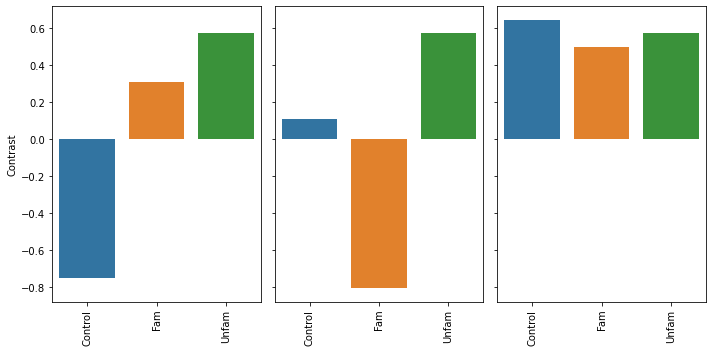

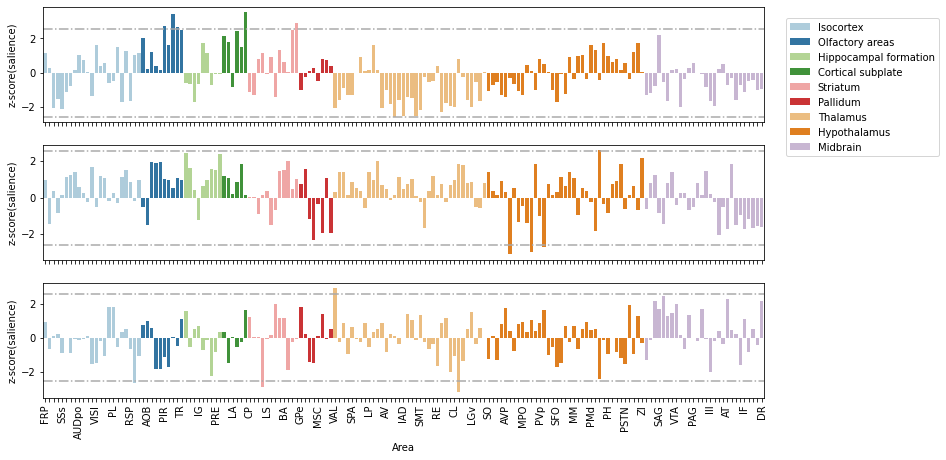

In [18]:
upls.plot_panel_contrasts(batch=batch, variable='energy')
upls.plot_panel_saliences(batch=batch, variable='energy', df_levels=df_levels)

# PLS density

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

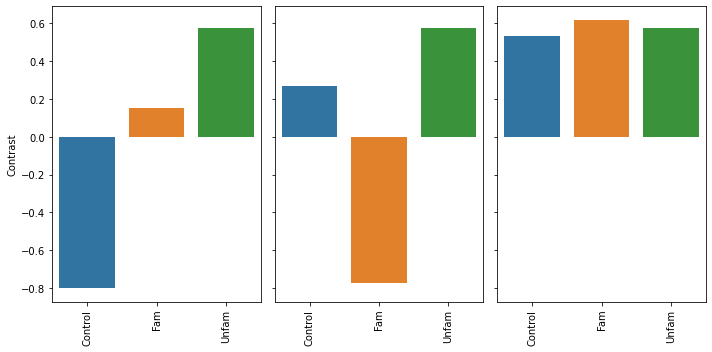

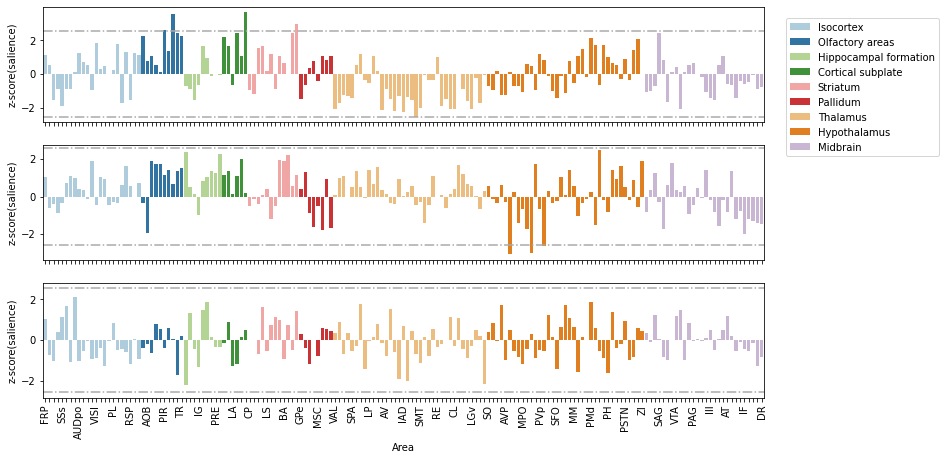

In [19]:
upls.plot_panel_contrasts(batch=batch, variable='density')
upls.plot_panel_saliences(batch=batch, variable='density', df_levels=df_levels)

# PLS relative density

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:ylabel='z-score(salience)'>,
        <AxesSubplot:xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

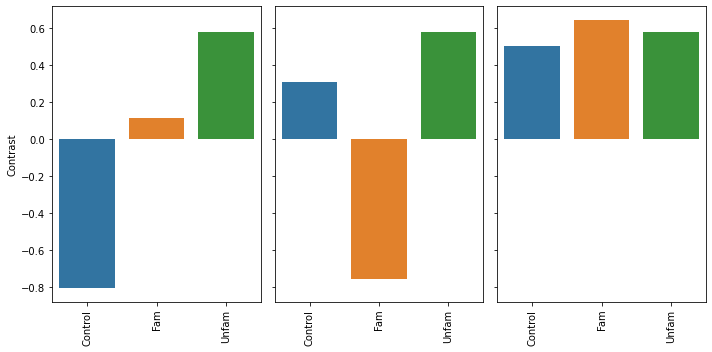

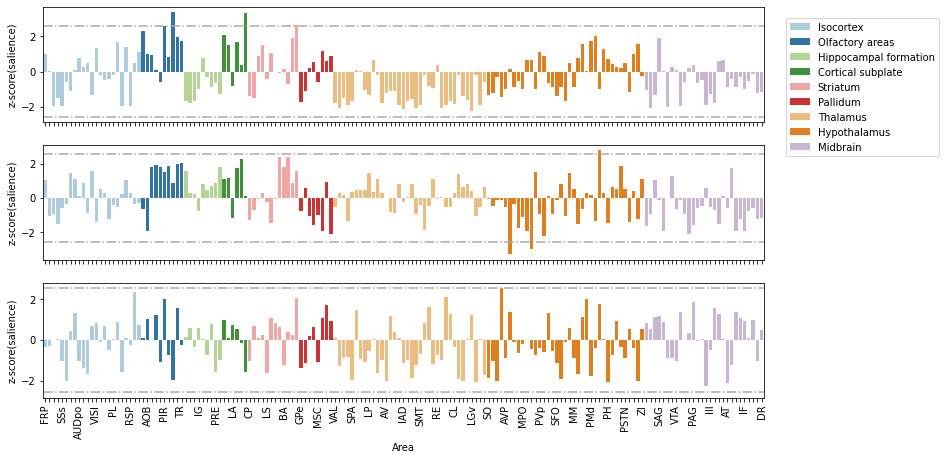

In [20]:
upls.plot_panel_contrasts(batch=batch, variable='relative_density')
upls.plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

# Identify areas with significant area contribution

In [21]:
pls_sig_areas = upls.identify_pls_sig_areas(saliences=saliences, 
                                       threshold=2.57, 
                                       volumes=volumes)
np.save('results_pls/pls_sig_areas_WILD_with_father.npy', pls_sig_areas)

In [8]:
pls_sig_areas = np.load('results_pls/pls_sig_areas_WILD_with_father.npy', allow_pickle=True)
pls_sig_areas

array(["Ammon's horn", 'Anteromedial visual area', 'Claustrum',
       'Cortical amygdalar area', 'Endopiriform nucleus',
       'Medial amygdalar nucleus', 'Olfactory tubercle',
       'Paraventricular hypothalamic nucleus descending division',
       'Piriform area', 'Posterior amygdalar nucleus',
       'Postpiriform transition area', 'Pretectal region'], dtype='<U56')

In [9]:
overlap = {'ncells':[], 'energy':[], 'density':[], 'relative_density':[]}
for variable in overlap.keys():
    overlap[variable] = set(upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=2.57, 
                                           volumes=volumes))
[len(overlap[key]) for key in overlap.keys()]

[11, 13, 7, 7]

In [10]:
overlap['relative_density']

{'Anteroventral periventricular nucleus',
 'Cortical amygdalar area',
 'Medial amygdalar nucleus',
 'Paraventricular hypothalamic nucleus descending division',
 'Piriform area',
 'Posterior amygdalar nucleus',
 'Posterodorsal preoptic nucleus'}

In [ ]:
# union between areas significant in all analyses
all_areas = overlap['ncells'].union(overlap['energy']).union(overlap['density']).union(overlap['relative_density'])
# intersection between areas significant in all analyses
intersection = overlap['ncells'].intersection(overlap['energy']).intersection(
    overlap['density']).intersection(overlap['relative_density'])
# filtering
intersection, len(intersection)

In [ ]:
overlap['relative_density']

In [ ]:
subjects = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Fam']<0.05]['area'].values).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Unfam']<0.05]['area'].values)).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Fam_vs_Unfam']<0.05]['area'].values))

In [ ]:
overlap['relative_density'].intersection(set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Fam']<0.05]['area'].values).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Unfam']<0.05]['area'].values)).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Fam_vs_Unfam']<0.05]['area'].values)))

In [ ]:
pls_sig_areas = upls.identify_pls_sig_areas(saliences=saliences, 
                                       threshold=2.57, 
                                       volumes=volumes)
np.save('results_pls/pls_sig_areas__fatherWILD_with.npy', pls_sig_areas)

# Only two groups: test fam vs unfam

In [ ]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
subject = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=list(dict_results_across_mice.keys()))

In [ ]:
for ctrl in experimental_groups['Unfam']:
    del dict_results_across_mice[ctrl]

In [ ]:
batch = 'wild_wf_ctrl_vs_fam'
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

In [ ]:
%%bash
python area_pls.py -i results_pls/wild_wf_ctrl_vs_fam_relative_density.csv -o './results_pls/wild_wf_ctrl_vs_fam_relative_density'

In [ ]:
def plot_panel_contrasts(batch, variable, palette='tab10'):
    contrasts = pd.read_csv('./results_pls/'+ batch +'_'+ variable +'_contrasts.csv')
    contrasts = contrasts.rename(columns={"group_Control": "Control", 
                                                  "group_Fam": "Fam", 
                                                  "group_Unfam":"Unfam"})
    contrasts = contrasts.rename(columns={"group_observer": "observer", 
                                                  "group_demonstrator": "demonstrator", 
                                                  "group_noshock":"noshock"})
    fig, axes = plt.subplots(1,2, sharey='row', figsize=(10,5))
    titles = ['First contrast',
             'Second contrast',
             'Third contrast']
    for i in range(2):
        upls.plot_contrasts(df_data=contrasts, index=i, ax=axes[i], palette=palette)
        axes[i].tick_params(axis='x', labelrotation=90)
        axes[i].set_title(titles[i])
        axes[i].set_ylabel('Contrast') if i==0 else axes[i].set_ylabel('')
        axes[i].set(xlabel=None)
    plt.tight_layout()
    return fig, axes

In [ ]:
plot_panel_contrasts(batch=batch, variable='relative_density')

In [ ]:
def plot_panel_saliences(batch, variable, df_levels, palette=sns.color_palette("Paired")):
    saliences = pd.read_csv('./results_pls/'+ batch +'_'+ variable +'_saliences.csv')
    fig, axes = plt.subplots(2,1, sharex='row', figsize=(13,7))
    plt.subplots_adjust(top=0.9, left=0.03, right=0.8)
    titles = ['First salience',
         'Second salience',
         'Third salience']
    n = 4  # Keeps every 7th label
    for i in range(2):
        upls.plot_saliences(df_data=saliences, index=i, ax=axes[i], 
                       df_levels=df_levels, palette=palette)
        axes[i].tick_params(axis='x', labelrotation=90)
        axes[i].axhline(y=2.57, linestyle='-.', color='darkgrey')
        axes[i].axhline(y=-2.57, linestyle='-.', color='darkgrey')
        [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
        axes[i].set_title(titles[i])
        axes[i].set_ylabel('z-score(salience)')
        if i!=1:
            axes[i].set_xlabel('')
            axes[i].set(xticklabels=[])
    axes[1].set_xlabel('Area')
    axes[0].legend(loc='right', bbox_to_anchor=(1.25,0.3))
    axes[1].get_legend().remove()
    return fig, axes
    

In [ ]:
plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

In [ ]:
variable='relative_density'
upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=2.56, 
                                           volumes=volumes)